In [1]:
import torch
import numpy as np
import random
import torch.nn as nn
import torch.nn.functional as F
import itertools
import pdb
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

import sys

sys.path.insert(0, './src')

from data import Dataset
from kernels import HMC_our, HMC_vanilla, Reverse_kernel
from models import Gen_network, Inf_network
from target import NN_bernoulli
from utils import plot_digit_samples, get_samples
from args import get_args

In [2]:
torchType = torch.float32

In [3]:
def set_seeds(rand_seed):
    torch.cuda.manual_seed_all(rand_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.manual_seed(rand_seed)
    np.random.seed(rand_seed)
    random.seed(rand_seed)

seed = 1 # 1337 #
set_seeds(seed)

In [4]:
args = get_args()

In [5]:
encoder = Inf_network(kwargs=args).to(args.device)
target = NN_bernoulli(kwargs=args, model=Gen_network(args.z_dim, args), device=args.device).to(args.device)

if args.learnable_reverse:
    reverse_kernel = Reverse_kernel(kwargs=args).to(args.device)
    reverse_params = reverse_kernel.parameters()
else:
    reverse_params = list([])

if args.amortize:
    transitions = HMC_our(kwargs=args).to(args.device)
else:
    transitions = nn.ModuleList([HMC_our(kwargs=args).to(args.device) for _ in range(args['K'])])
    
for p in transitions.parameters():
    p.requires_grad_(False)

params = [encoder.parameters(), target.parameters(), transitions.parameters(), reverse_params]
optimizer = torch.optim.Adam(params=itertools.chain(*params), lr=args.learning_rate)

In [6]:
dataset = Dataset(args, device=args.device)

In [7]:
random_code = args.std_normal.sample((64, args.z_dim))

  0%|          | 0/500 [00:00<?, ?it/s]

On batch number 1/100 and on k = 1 we have for  0: 0.5320000252686441 and for +1: 0.4680000222288072
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4600000218488276 and for +1: 0.5400000256486237
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 1 	 Current ELBO: -784.7891235351562
Saved samples to ./pics/mnist_epoch_0_K_2_N_2_amortize_True.png


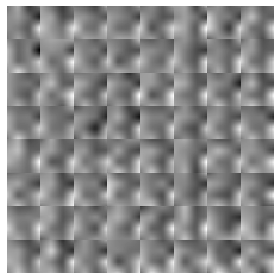

  0%|          | 1/500 [00:22<3:07:50, 22.59s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 2 	 Current ELBO: -764.9226684570312
Saved samples to ./pics/mnist_epoch_1_K_2_N_2_amortize_True.png


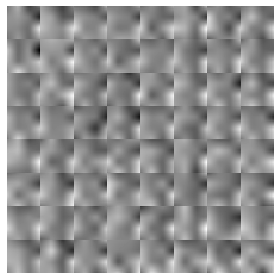

  0%|          | 2/500 [00:45<3:07:22, 22.58s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 3 	 Current ELBO: -751.1871337890625
Saved samples to ./pics/mnist_epoch_2_K_2_N_2_amortize_True.png


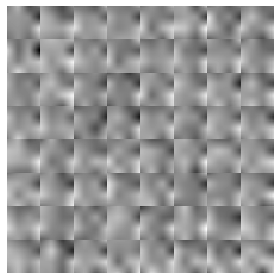

  1%|          | 3/500 [01:07<3:07:03, 22.58s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 4 	 Current ELBO: -719.0238037109375
Saved samples to ./pics/mnist_epoch_3_K_2_N_2_amortize_True.png


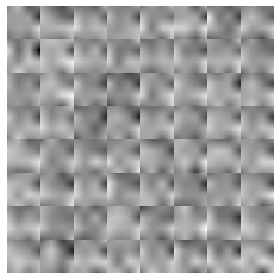

  1%|          | 4/500 [01:30<3:06:52, 22.61s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5240000248886645 and for +1: 0.4760000226087868
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 5 	 Current ELBO: -690.0831298828125
Saved samples to ./pics/mnist_epoch_4_K_2_N_2_amortize_True.png


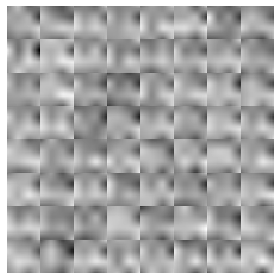

  1%|          | 5/500 [01:53<3:06:38, 22.62s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5260000249836594 and for +1: 0.4740000225137919
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 6 	 Current ELBO: -677.4940185546875
Saved samples to ./pics/mnist_epoch_5_K_2_N_2_amortize_True.png


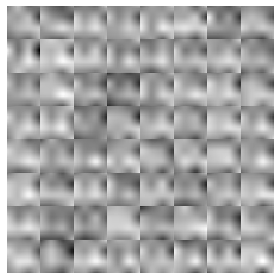

  1%|          | 6/500 [02:15<3:06:27, 22.65s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5560000264085829 and for +1: 0.4440000210888684
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 7 	 Current ELBO: -646.8076171875
Saved samples to ./pics/mnist_epoch_6_K_2_N_2_amortize_True.png


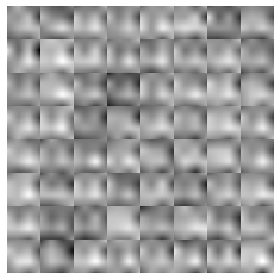

  1%|▏         | 7/500 [02:38<3:06:21, 22.68s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.472000022418797 and for +1: 0.5280000250786543
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 8 	 Current ELBO: -632.6188354492188
Saved samples to ./pics/mnist_epoch_7_K_2_N_2_amortize_True.png


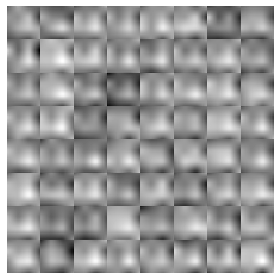

  2%|▏         | 8/500 [03:01<3:06:09, 22.70s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 9 	 Current ELBO: -619.4153442382812
Saved samples to ./pics/mnist_epoch_8_K_2_N_2_amortize_True.png


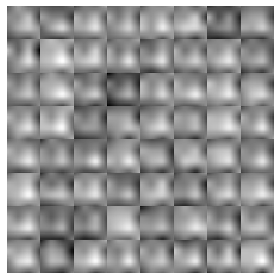

  2%|▏         | 9/500 [03:24<3:05:55, 22.72s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5520000262185931 and for +1: 0.4480000212788582
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 10 	 Current ELBO: -584.4092407226562
Saved samples to ./pics/mnist_epoch_9_K_2_N_2_amortize_True.png


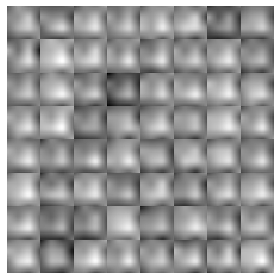

  2%|▏         | 10/500 [03:46<3:05:37, 22.73s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4760000226087868 and for +1: 0.5240000248886645
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 11 	 Current ELBO: -569.7943725585938
Saved samples to ./pics/mnist_epoch_10_K_2_N_2_amortize_True.png


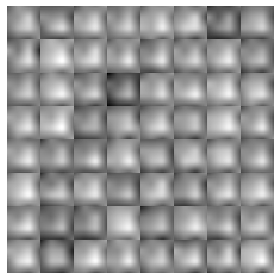

  2%|▏         | 11/500 [04:09<3:05:26, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 12 	 Current ELBO: -534.5402221679688
Saved samples to ./pics/mnist_epoch_11_K_2_N_2_amortize_True.png


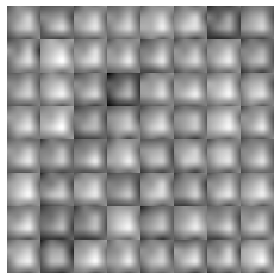

  2%|▏         | 12/500 [04:32<3:05:03, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4580000217538327 and for +1: 0.5420000257436186
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 13 	 Current ELBO: -509.4527893066406
Saved samples to ./pics/mnist_epoch_12_K_2_N_2_amortize_True.png


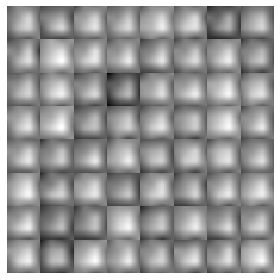

  3%|▎         | 13/500 [04:55<3:04:40, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5240000248886645 and for +1: 0.4760000226087868
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 14 	 Current ELBO: -482.41082763671875
Saved samples to ./pics/mnist_epoch_13_K_2_N_2_amortize_True.png


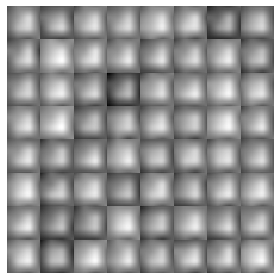

  3%|▎         | 14/500 [05:17<3:04:17, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5360000254586339 and for +1: 0.4640000220388174
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 15 	 Current ELBO: -453.2213439941406
Saved samples to ./pics/mnist_epoch_14_K_2_N_2_amortize_True.png


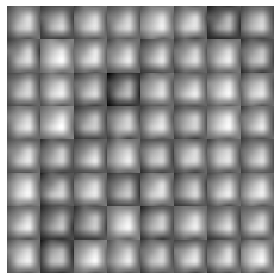

  3%|▎         | 15/500 [05:40<3:03:55, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4700000223238021 and for +1: 0.5300000251736492
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 16 	 Current ELBO: -428.6246643066406
Saved samples to ./pics/mnist_epoch_15_K_2_N_2_amortize_True.png


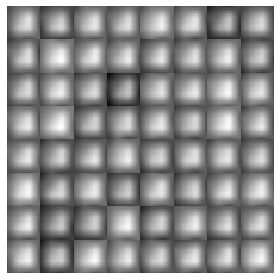

  3%|▎         | 16/500 [06:03<3:03:36, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 17 	 Current ELBO: -422.74114990234375
Saved samples to ./pics/mnist_epoch_16_K_2_N_2_amortize_True.png


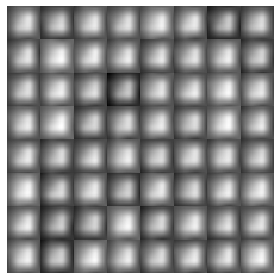

  3%|▎         | 17/500 [06:26<3:03:12, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 18 	 Current ELBO: -390.6094055175781
Saved samples to ./pics/mnist_epoch_17_K_2_N_2_amortize_True.png


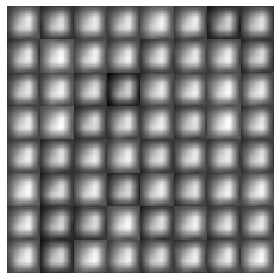

  4%|▎         | 18/500 [06:48<3:02:48, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4660000221338123 and for +1: 0.534000025363639
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 19 	 Current ELBO: -386.9715270996094
Saved samples to ./pics/mnist_epoch_18_K_2_N_2_amortize_True.png


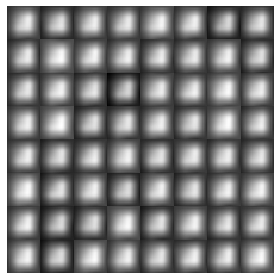

  4%|▍         | 19/500 [07:11<3:02:25, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4600000218488276 and for +1: 0.5400000256486237
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 20 	 Current ELBO: -374.1624450683594
Saved samples to ./pics/mnist_epoch_19_K_2_N_2_amortize_True.png


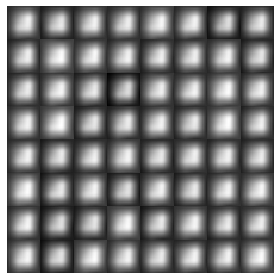

  4%|▍         | 20/500 [07:34<3:02:02, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4700000223238021 and for +1: 0.5300000251736492
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5160000245086849 and for +1: 0.48400002298876643
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 21 	 Current ELBO: -357.6501770019531
Saved samples to ./pics/mnist_epoch_20_K_2_N_2_amortize_True.png


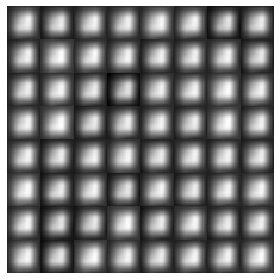

  4%|▍         | 21/500 [07:57<3:01:40, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 22 	 Current ELBO: -350.8883972167969
Saved samples to ./pics/mnist_epoch_21_K_2_N_2_amortize_True.png


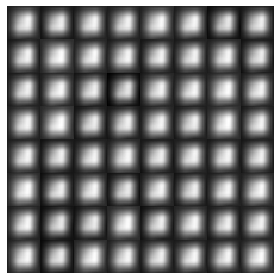

  4%|▍         | 22/500 [08:19<3:01:17, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4740000225137919 and for +1: 0.5260000249836594
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 23 	 Current ELBO: -349.8544616699219
Saved samples to ./pics/mnist_epoch_22_K_2_N_2_amortize_True.png


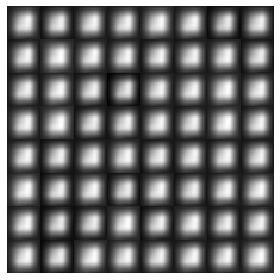

  5%|▍         | 23/500 [08:42<3:00:55, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4600000218488276 and for +1: 0.5400000256486237
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 24 	 Current ELBO: -337.8109436035156
Saved samples to ./pics/mnist_epoch_23_K_2_N_2_amortize_True.png


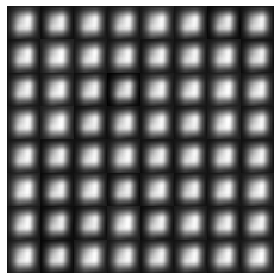

  5%|▍         | 24/500 [09:05<3:00:32, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5400000256486237 and for +1: 0.4600000218488276
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 25 	 Current ELBO: -337.2537536621094
Saved samples to ./pics/mnist_epoch_24_K_2_N_2_amortize_True.png


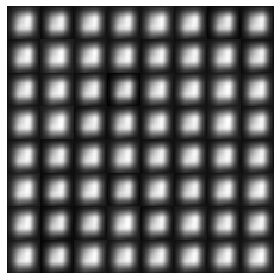

  5%|▌         | 25/500 [09:28<3:00:14, 22.77s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5260000249836594 and for +1: 0.4740000225137919
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 26 	 Current ELBO: -334.5677185058594
Saved samples to ./pics/mnist_epoch_25_K_2_N_2_amortize_True.png


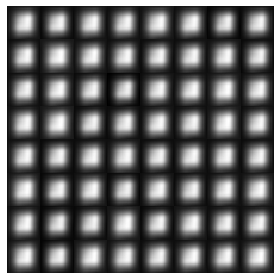

  5%|▌         | 26/500 [09:50<2:59:49, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.42200002004392445 and for +1: 0.5780000274535269
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 27 	 Current ELBO: -325.1909484863281
Saved samples to ./pics/mnist_epoch_26_K_2_N_2_amortize_True.png


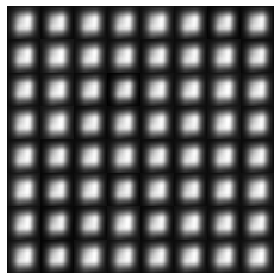

  5%|▌         | 27/500 [10:13<2:59:25, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4620000219438225 and for +1: 0.5380000255536288
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 28 	 Current ELBO: -331.5699462890625
Saved samples to ./pics/mnist_epoch_27_K_2_N_2_amortize_True.png


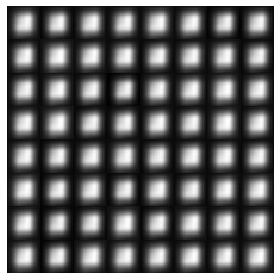

  6%|▌         | 28/500 [10:36<2:59:01, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5320000252686441 and for +1: 0.4680000222288072
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 29 	 Current ELBO: -325.0022277832031
Saved samples to ./pics/mnist_epoch_28_K_2_N_2_amortize_True.png


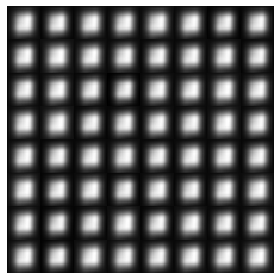

  6%|▌         | 29/500 [10:59<2:58:37, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.472000022418797 and for +1: 0.5280000250786543
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 30 	 Current ELBO: -316.5045166015625
Saved samples to ./pics/mnist_epoch_29_K_2_N_2_amortize_True.png


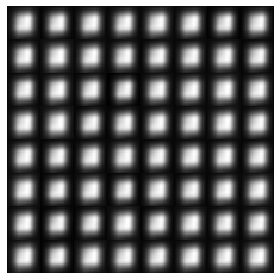

  6%|▌         | 30/500 [11:21<2:58:14, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5160000245086849 and for +1: 0.48400002298876643
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5440000258386135 and for +1: 0.4560000216588378
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 31 	 Current ELBO: -321.8954772949219
Saved samples to ./pics/mnist_epoch_30_K_2_N_2_amortize_True.png


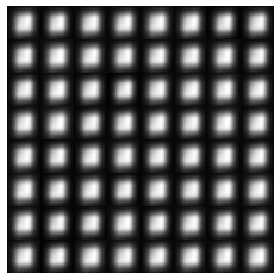

  6%|▌         | 31/500 [11:44<2:57:50, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 32 	 Current ELBO: -322.5547180175781
Saved samples to ./pics/mnist_epoch_31_K_2_N_2_amortize_True.png


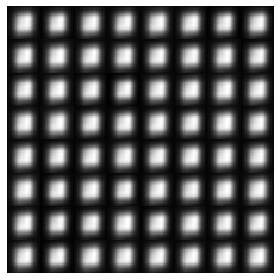

  6%|▋         | 32/500 [12:07<2:57:27, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 33 	 Current ELBO: -320.8929748535156
Saved samples to ./pics/mnist_epoch_32_K_2_N_2_amortize_True.png


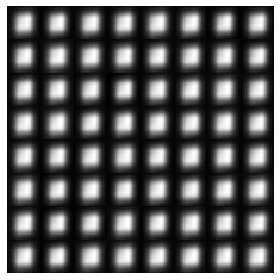

  7%|▋         | 33/500 [12:30<2:57:04, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 34 	 Current ELBO: -315.2012023925781
Saved samples to ./pics/mnist_epoch_33_K_2_N_2_amortize_True.png


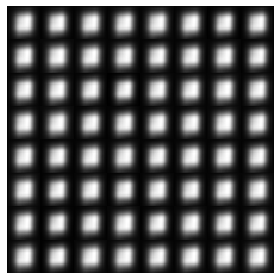

  7%|▋         | 34/500 [12:52<2:56:42, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5260000249836594 and for +1: 0.4740000225137919
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 35 	 Current ELBO: -300.5698547363281
Saved samples to ./pics/mnist_epoch_34_K_2_N_2_amortize_True.png


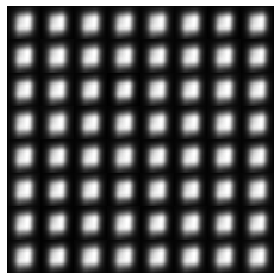

  7%|▋         | 35/500 [13:15<2:56:19, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5420000257436186 and for +1: 0.4580000217538327
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4700000223238021 and for +1: 0.5300000251736492
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 36 	 Current ELBO: -310.7833251953125
Saved samples to ./pics/mnist_epoch_35_K_2_N_2_amortize_True.png


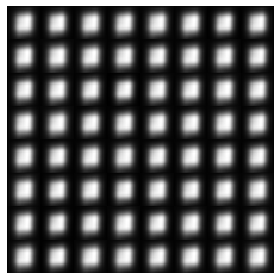

  7%|▋         | 36/500 [13:38<2:55:56, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 37 	 Current ELBO: -314.17584228515625
Saved samples to ./pics/mnist_epoch_36_K_2_N_2_amortize_True.png


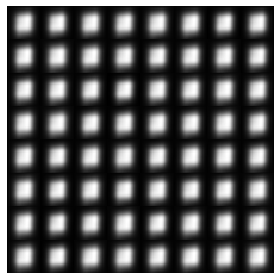

  7%|▋         | 37/500 [14:01<2:55:33, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 38 	 Current ELBO: -307.9930114746094
Saved samples to ./pics/mnist_epoch_37_K_2_N_2_amortize_True.png


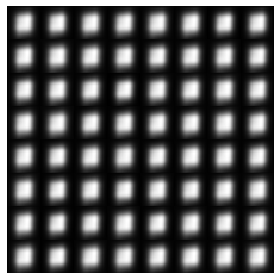

  8%|▊         | 38/500 [14:23<2:55:10, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5520000262185931 and for +1: 0.4480000212788582
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 39 	 Current ELBO: -309.9878234863281
Saved samples to ./pics/mnist_epoch_38_K_2_N_2_amortize_True.png


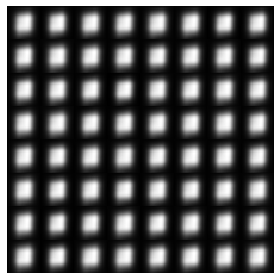

  8%|▊         | 39/500 [14:46<2:54:52, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5160000245086849 and for +1: 0.48400002298876643
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 40 	 Current ELBO: -305.7334899902344
Saved samples to ./pics/mnist_epoch_39_K_2_N_2_amortize_True.png


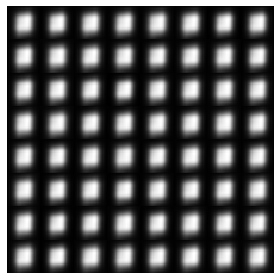

  8%|▊         | 40/500 [15:09<2:54:28, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5300000251736492 and for +1: 0.4700000223238021
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 41 	 Current ELBO: -305.28009033203125
Saved samples to ./pics/mnist_epoch_40_K_2_N_2_amortize_True.png


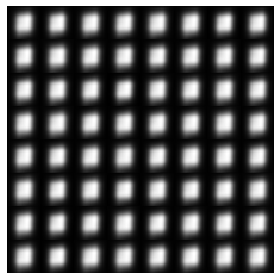

  8%|▊         | 41/500 [15:32<2:54:05, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5160000245086849 and for +1: 0.48400002298876643
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 42 	 Current ELBO: -309.6150207519531
Saved samples to ./pics/mnist_epoch_41_K_2_N_2_amortize_True.png


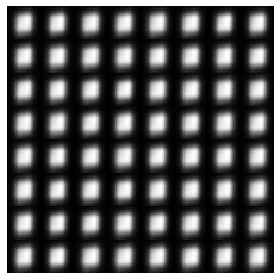

  8%|▊         | 42/500 [15:55<2:53:41, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 43 	 Current ELBO: -307.29058837890625
Saved samples to ./pics/mnist_epoch_42_K_2_N_2_amortize_True.png


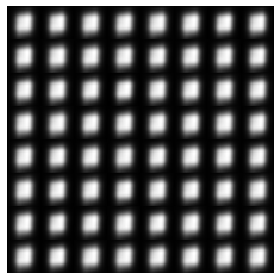

  9%|▊         | 43/500 [16:17<2:53:19, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 44 	 Current ELBO: -309.0234069824219
Saved samples to ./pics/mnist_epoch_43_K_2_N_2_amortize_True.png


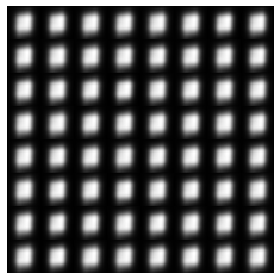

  9%|▉         | 44/500 [16:40<2:52:56, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 45 	 Current ELBO: -302.5484924316406
Saved samples to ./pics/mnist_epoch_44_K_2_N_2_amortize_True.png


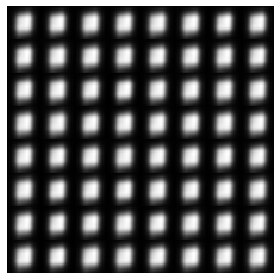

  9%|▉         | 45/500 [17:03<2:52:33, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4780000227037817 and for +1: 0.5220000247936696
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 46 	 Current ELBO: -312.69122314453125
Saved samples to ./pics/mnist_epoch_45_K_2_N_2_amortize_True.png


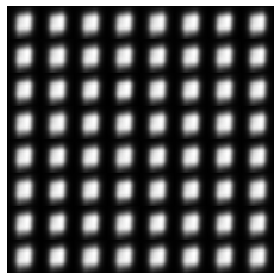

  9%|▉         | 46/500 [17:26<2:52:10, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 47 	 Current ELBO: -306.7137145996094
Saved samples to ./pics/mnist_epoch_46_K_2_N_2_amortize_True.png


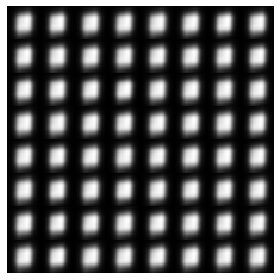

  9%|▉         | 47/500 [17:48<2:51:47, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5160000245086849 and for +1: 0.48400002298876643
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 48 	 Current ELBO: -308.46453857421875
Saved samples to ./pics/mnist_epoch_47_K_2_N_2_amortize_True.png


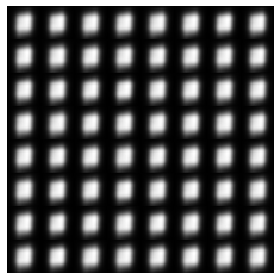

 10%|▉         | 48/500 [18:11<2:51:24, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 49 	 Current ELBO: -309.29339599609375
Saved samples to ./pics/mnist_epoch_48_K_2_N_2_amortize_True.png


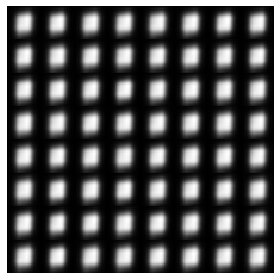

 10%|▉         | 49/500 [18:34<2:51:02, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 50 	 Current ELBO: -305.1240539550781
Saved samples to ./pics/mnist_epoch_49_K_2_N_2_amortize_True.png


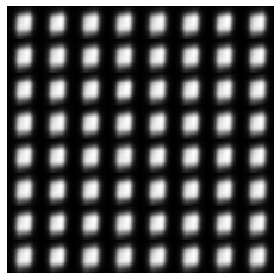

 10%|█         | 50/500 [18:57<2:50:41, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 51 	 Current ELBO: -304.8065185546875
Saved samples to ./pics/mnist_epoch_50_K_2_N_2_amortize_True.png


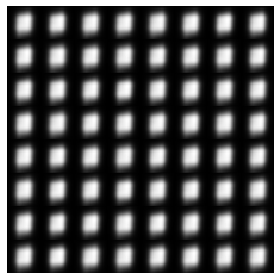

 10%|█         | 51/500 [19:19<2:50:18, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5240000248886645 and for +1: 0.4760000226087868
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 52 	 Current ELBO: -303.6780090332031
Saved samples to ./pics/mnist_epoch_51_K_2_N_2_amortize_True.png


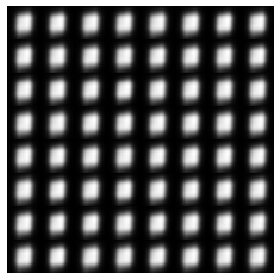

 10%|█         | 52/500 [19:42<2:49:54, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4760000226087868 and for +1: 0.5240000248886645
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 53 	 Current ELBO: -309.2711181640625
Saved samples to ./pics/mnist_epoch_52_K_2_N_2_amortize_True.png


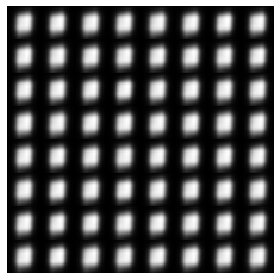

 11%|█         | 53/500 [20:05<2:49:36, 22.77s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5220000247936696 and for +1: 0.4780000227037817
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 54 	 Current ELBO: -301.2273864746094
Saved samples to ./pics/mnist_epoch_53_K_2_N_2_amortize_True.png


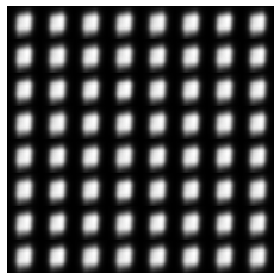

 11%|█         | 54/500 [20:28<2:49:12, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4680000222288072 and for +1: 0.5320000252686441
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 55 	 Current ELBO: -310.3860168457031
Saved samples to ./pics/mnist_epoch_54_K_2_N_2_amortize_True.png


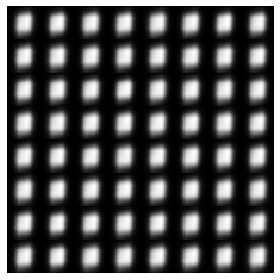

 11%|█         | 55/500 [20:50<2:48:48, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5260000249836594 and for +1: 0.4740000225137919
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.534000025363639 and for +1: 0.4660000221338123
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 56 	 Current ELBO: -301.9923095703125
Saved samples to ./pics/mnist_epoch_55_K_2_N_2_amortize_True.png


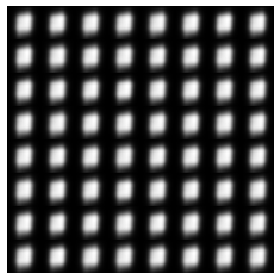

 11%|█         | 56/500 [21:13<2:48:24, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4480000212788582 and for +1: 0.5520000262185931
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 57 	 Current ELBO: -311.07952880859375
Saved samples to ./pics/mnist_epoch_56_K_2_N_2_amortize_True.png


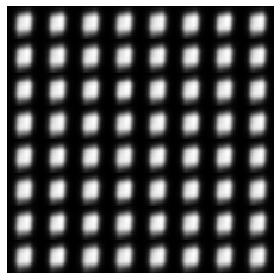

 11%|█▏        | 57/500 [21:36<2:48:00, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5160000245086849 and for +1: 0.48400002298876643
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 58 	 Current ELBO: -310.2288513183594
Saved samples to ./pics/mnist_epoch_57_K_2_N_2_amortize_True.png


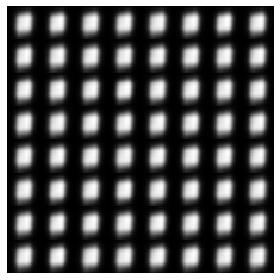

 12%|█▏        | 58/500 [21:59<2:47:37, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.472000022418797 and for +1: 0.5280000250786543
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 59 	 Current ELBO: -295.2495422363281
Saved samples to ./pics/mnist_epoch_58_K_2_N_2_amortize_True.png


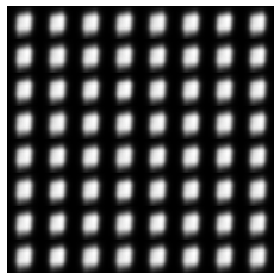

 12%|█▏        | 59/500 [22:21<2:47:14, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 60 	 Current ELBO: -306.4043273925781
Saved samples to ./pics/mnist_epoch_59_K_2_N_2_amortize_True.png


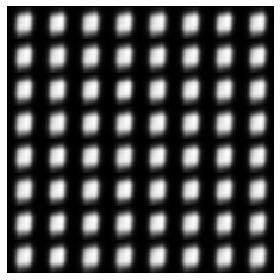

 12%|█▏        | 60/500 [22:44<2:46:51, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 61 	 Current ELBO: -292.32171630859375
Saved samples to ./pics/mnist_epoch_60_K_2_N_2_amortize_True.png


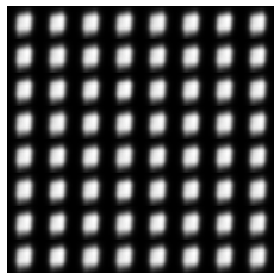

 12%|█▏        | 61/500 [23:07<2:46:28, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 62 	 Current ELBO: -298.03857421875
Saved samples to ./pics/mnist_epoch_61_K_2_N_2_amortize_True.png


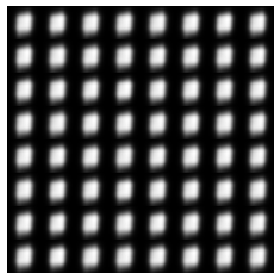

 12%|█▏        | 62/500 [23:30<2:46:05, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 63 	 Current ELBO: -311.1546936035156
Saved samples to ./pics/mnist_epoch_62_K_2_N_2_amortize_True.png


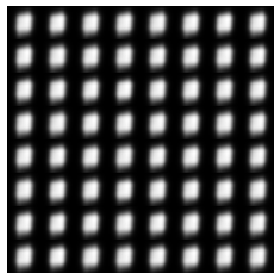

 13%|█▎        | 63/500 [23:52<2:45:42, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4760000226087868 and for +1: 0.5240000248886645
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 64 	 Current ELBO: -303.0596008300781
Saved samples to ./pics/mnist_epoch_63_K_2_N_2_amortize_True.png


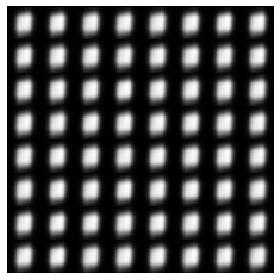

 13%|█▎        | 64/500 [24:15<2:45:19, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5300000251736492 and for +1: 0.4700000223238021
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 65 	 Current ELBO: -304.48675537109375
Saved samples to ./pics/mnist_epoch_64_K_2_N_2_amortize_True.png


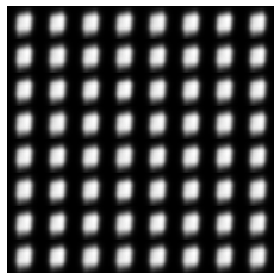

 13%|█▎        | 65/500 [24:38<2:44:57, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4780000227037817 and for +1: 0.5220000247936696
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4560000216588378 and for +1: 0.5440000258386135
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 66 	 Current ELBO: -296.47412109375
Saved samples to ./pics/mnist_epoch_65_K_2_N_2_amortize_True.png


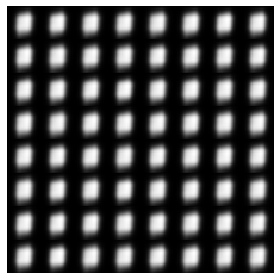

 13%|█▎        | 66/500 [25:01<2:44:34, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4740000225137919 and for +1: 0.5260000249836594
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 67 	 Current ELBO: -308.4379577636719
Saved samples to ./pics/mnist_epoch_66_K_2_N_2_amortize_True.png


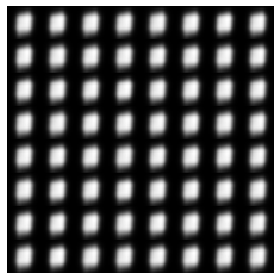

 13%|█▎        | 67/500 [25:23<2:44:16, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5440000258386135 and for +1: 0.4560000216588378
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 68 	 Current ELBO: -296.07318115234375
Saved samples to ./pics/mnist_epoch_67_K_2_N_2_amortize_True.png


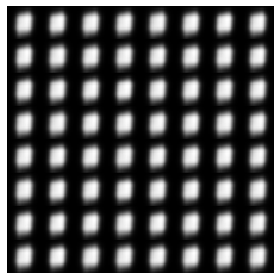

 14%|█▎        | 68/500 [25:46<2:43:51, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4540000215638429 and for +1: 0.5460000259336084
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 69 	 Current ELBO: -307.5984191894531
Saved samples to ./pics/mnist_epoch_68_K_2_N_2_amortize_True.png


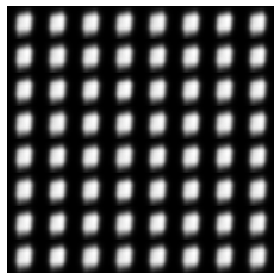

 14%|█▍        | 69/500 [26:09<2:43:27, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5300000251736492 and for +1: 0.4700000223238021
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 70 	 Current ELBO: -311.3677673339844
Saved samples to ./pics/mnist_epoch_69_K_2_N_2_amortize_True.png


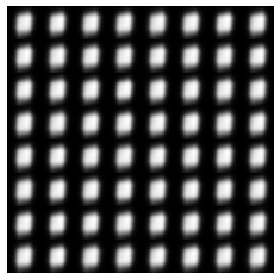

 14%|█▍        | 70/500 [26:32<2:43:03, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.472000022418797 and for +1: 0.5280000250786543
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 71 	 Current ELBO: -312.94183349609375
Saved samples to ./pics/mnist_epoch_70_K_2_N_2_amortize_True.png


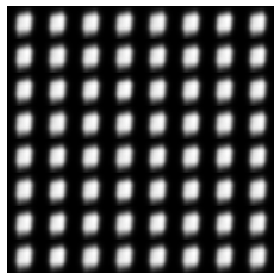

 14%|█▍        | 71/500 [26:54<2:42:43, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5300000251736492 and for +1: 0.4700000223238021
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 72 	 Current ELBO: -290.01055908203125
Saved samples to ./pics/mnist_epoch_71_K_2_N_2_amortize_True.png


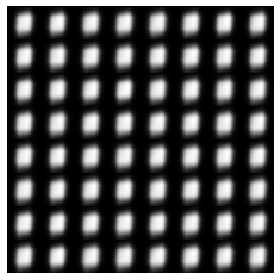

 14%|█▍        | 72/500 [27:17<2:42:19, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 73 	 Current ELBO: -303.9898986816406
Saved samples to ./pics/mnist_epoch_72_K_2_N_2_amortize_True.png


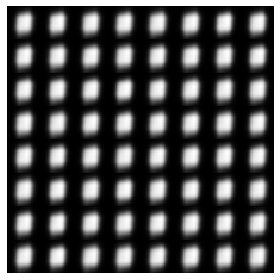

 15%|█▍        | 73/500 [27:40<2:41:56, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 74 	 Current ELBO: -303.2315673828125
Saved samples to ./pics/mnist_epoch_73_K_2_N_2_amortize_True.png


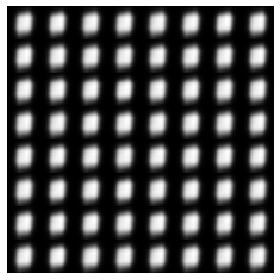

 15%|█▍        | 74/500 [28:03<2:41:33, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 75 	 Current ELBO: -304.069091796875
Saved samples to ./pics/mnist_epoch_74_K_2_N_2_amortize_True.png


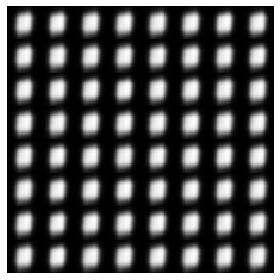

 15%|█▌        | 75/500 [28:25<2:41:10, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5240000248886645 and for +1: 0.4760000226087868
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 76 	 Current ELBO: -305.6986389160156
Saved samples to ./pics/mnist_epoch_75_K_2_N_2_amortize_True.png


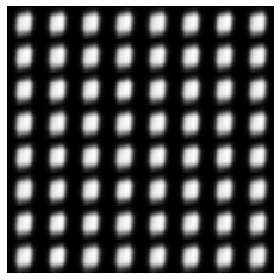

 15%|█▌        | 76/500 [28:48<2:40:47, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 77 	 Current ELBO: -305.0384521484375
Saved samples to ./pics/mnist_epoch_76_K_2_N_2_amortize_True.png


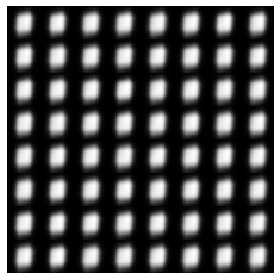

 15%|█▌        | 77/500 [29:11<2:40:28, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5400000256486237 and for +1: 0.4600000218488276
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 78 	 Current ELBO: -301.5480041503906
Saved samples to ./pics/mnist_epoch_77_K_2_N_2_amortize_True.png


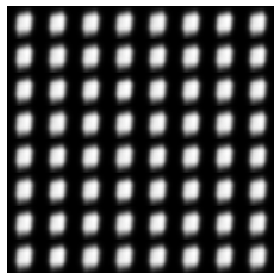

 16%|█▌        | 78/500 [29:34<2:40:03, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 79 	 Current ELBO: -303.538330078125
Saved samples to ./pics/mnist_epoch_78_K_2_N_2_amortize_True.png


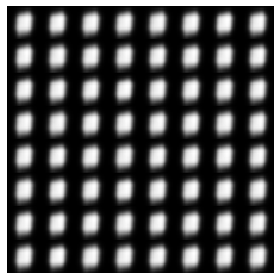

 16%|█▌        | 79/500 [29:56<2:39:39, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 80 	 Current ELBO: -316.5303955078125
Saved samples to ./pics/mnist_epoch_79_K_2_N_2_amortize_True.png


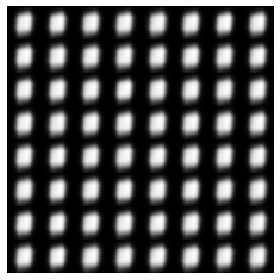

 16%|█▌        | 80/500 [30:19<2:39:16, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4600000218488276 and for +1: 0.5400000256486237
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4740000225137919 and for +1: 0.5260000249836594
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 81 	 Current ELBO: -296.8938903808594
Saved samples to ./pics/mnist_epoch_80_K_2_N_2_amortize_True.png


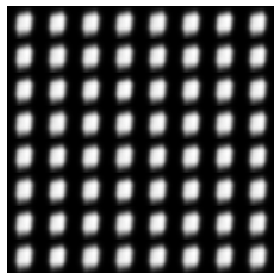

 16%|█▌        | 81/500 [30:42<2:38:57, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5280000250786543 and for +1: 0.472000022418797
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 82 	 Current ELBO: -303.5861511230469
Saved samples to ./pics/mnist_epoch_81_K_2_N_2_amortize_True.png


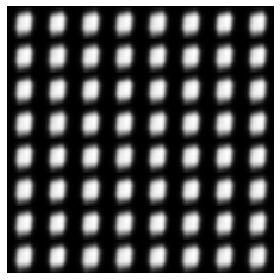

 16%|█▋        | 82/500 [31:05<2:38:33, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 83 	 Current ELBO: -307.4010009765625
Saved samples to ./pics/mnist_epoch_82_K_2_N_2_amortize_True.png


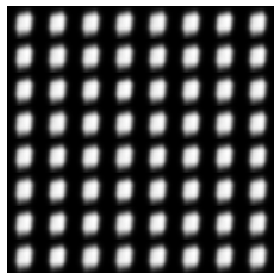

 17%|█▋        | 83/500 [31:28<2:38:09, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4480000212788582 and for +1: 0.5520000262185931
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5360000254586339 and for +1: 0.4640000220388174
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 84 	 Current ELBO: -297.27587890625
Saved samples to ./pics/mnist_epoch_83_K_2_N_2_amortize_True.png


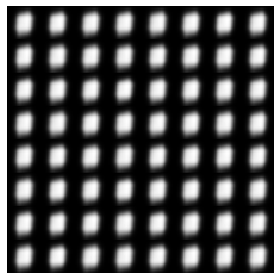

 17%|█▋        | 84/500 [31:50<2:37:47, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4780000227037817 and for +1: 0.5220000247936696
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 85 	 Current ELBO: -298.852783203125
Saved samples to ./pics/mnist_epoch_84_K_2_N_2_amortize_True.png


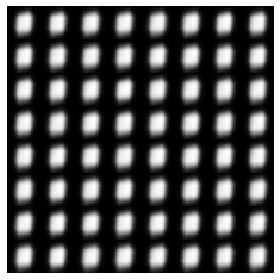

 17%|█▋        | 85/500 [32:13<2:37:24, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 86 	 Current ELBO: -302.4325256347656
Saved samples to ./pics/mnist_epoch_85_K_2_N_2_amortize_True.png


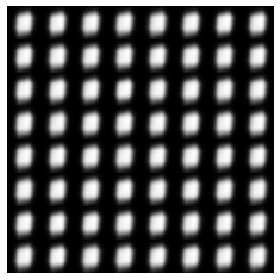

 17%|█▋        | 86/500 [32:36<2:37:00, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 87 	 Current ELBO: -297.7471923828125
Saved samples to ./pics/mnist_epoch_86_K_2_N_2_amortize_True.png


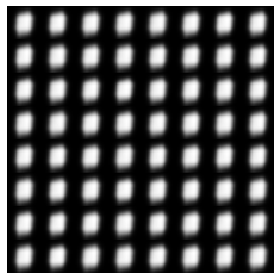

 17%|█▋        | 87/500 [32:59<2:36:37, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 88 	 Current ELBO: -310.7288818359375
Saved samples to ./pics/mnist_epoch_87_K_2_N_2_amortize_True.png


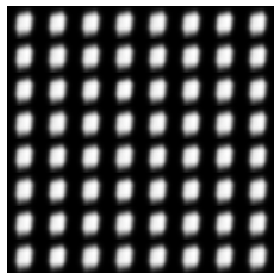

 18%|█▊        | 88/500 [33:21<2:36:14, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4760000226087868 and for +1: 0.5240000248886645
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 89 	 Current ELBO: -298.5550537109375
Saved samples to ./pics/mnist_epoch_88_K_2_N_2_amortize_True.png


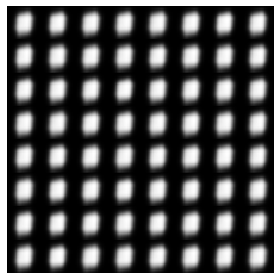

 18%|█▊        | 89/500 [33:44<2:35:51, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4620000219438225 and for +1: 0.5380000255536288
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 90 	 Current ELBO: -295.8509826660156
Saved samples to ./pics/mnist_epoch_89_K_2_N_2_amortize_True.png


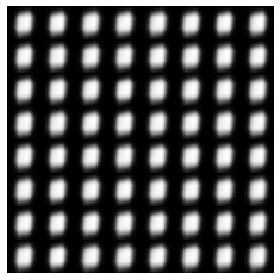

 18%|█▊        | 90/500 [34:07<2:35:29, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 91 	 Current ELBO: -296.6300964355469
Saved samples to ./pics/mnist_epoch_90_K_2_N_2_amortize_True.png


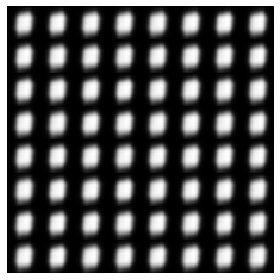

 18%|█▊        | 91/500 [34:30<2:35:06, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5240000248886645 and for +1: 0.4760000226087868
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 92 	 Current ELBO: -302.3154296875
Saved samples to ./pics/mnist_epoch_91_K_2_N_2_amortize_True.png


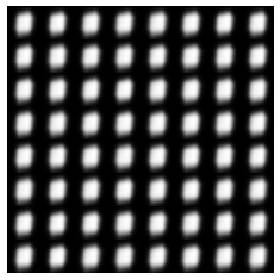

 18%|█▊        | 92/500 [34:52<2:34:43, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 93 	 Current ELBO: -305.025390625
Saved samples to ./pics/mnist_epoch_92_K_2_N_2_amortize_True.png


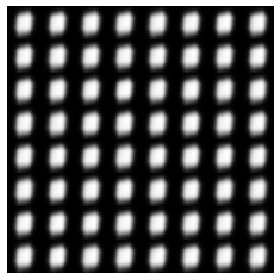

 19%|█▊        | 93/500 [35:15<2:34:24, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 94 	 Current ELBO: -303.0472106933594
Saved samples to ./pics/mnist_epoch_93_K_2_N_2_amortize_True.png


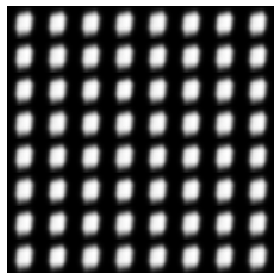

 19%|█▉        | 94/500 [35:38<2:34:00, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4760000226087868 and for +1: 0.5240000248886645
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4740000225137919 and for +1: 0.5260000249836594
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 95 	 Current ELBO: -289.67108154296875
Saved samples to ./pics/mnist_epoch_94_K_2_N_2_amortize_True.png


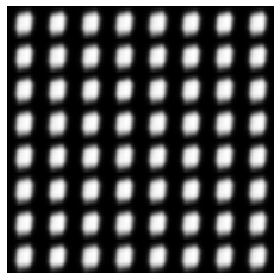

 19%|█▉        | 95/500 [36:01<2:33:40, 22.77s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4540000215638429 and for +1: 0.5460000259336084
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 96 	 Current ELBO: -298.1255798339844
Saved samples to ./pics/mnist_epoch_95_K_2_N_2_amortize_True.png


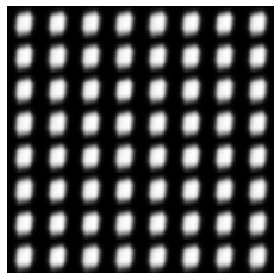

 19%|█▉        | 96/500 [36:23<2:33:15, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4740000225137919 and for +1: 0.5260000249836594
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 97 	 Current ELBO: -296.930419921875
Saved samples to ./pics/mnist_epoch_96_K_2_N_2_amortize_True.png


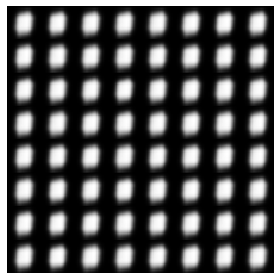

 19%|█▉        | 97/500 [36:46<2:32:51, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5220000247936696 and for +1: 0.4780000227037817
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 98 	 Current ELBO: -306.2652893066406
Saved samples to ./pics/mnist_epoch_97_K_2_N_2_amortize_True.png


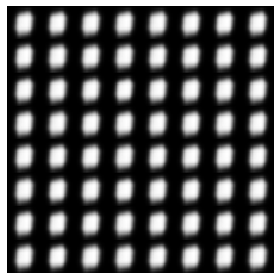

 20%|█▉        | 98/500 [37:09<2:32:27, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.43400002061389387 and for +1: 0.5660000268835574
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 99 	 Current ELBO: -295.3028259277344
Saved samples to ./pics/mnist_epoch_98_K_2_N_2_amortize_True.png


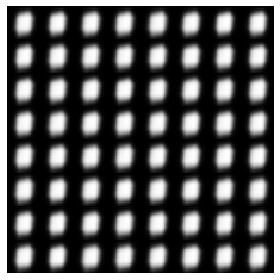

 20%|█▉        | 99/500 [37:32<2:32:04, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 100 	 Current ELBO: -301.91571044921875
Saved samples to ./pics/mnist_epoch_99_K_2_N_2_amortize_True.png


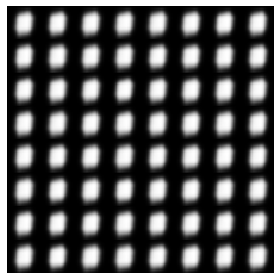

 20%|██        | 100/500 [37:54<2:31:43, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5220000247936696 and for +1: 0.4780000227037817
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5320000252686441 and for +1: 0.4680000222288072
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 101 	 Current ELBO: -307.6197204589844
Saved samples to ./pics/mnist_epoch_100_K_2_N_2_amortize_True.png


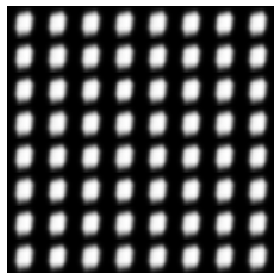

 20%|██        | 101/500 [38:17<2:31:19, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4580000217538327 and for +1: 0.5420000257436186
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 102 	 Current ELBO: -300.9805908203125
Saved samples to ./pics/mnist_epoch_101_K_2_N_2_amortize_True.png


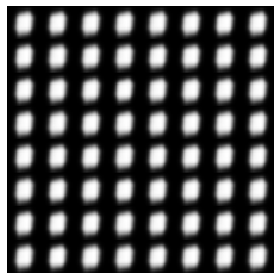

 20%|██        | 102/500 [38:40<2:30:56, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 103 	 Current ELBO: -288.48480224609375
Saved samples to ./pics/mnist_epoch_102_K_2_N_2_amortize_True.png


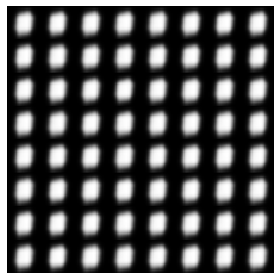

 21%|██        | 103/500 [39:03<2:30:33, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5420000257436186 and for +1: 0.4580000217538327
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 104 	 Current ELBO: -308.077880859375
Saved samples to ./pics/mnist_epoch_103_K_2_N_2_amortize_True.png


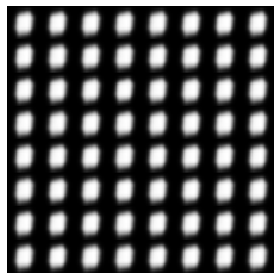

 21%|██        | 104/500 [39:25<2:30:09, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 105 	 Current ELBO: -298.4140930175781
Saved samples to ./pics/mnist_epoch_104_K_2_N_2_amortize_True.png


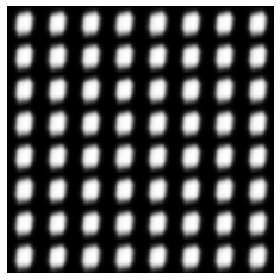

 21%|██        | 105/500 [39:48<2:29:49, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5220000247936696 and for +1: 0.4780000227037817
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 106 	 Current ELBO: -301.55810546875
Saved samples to ./pics/mnist_epoch_105_K_2_N_2_amortize_True.png


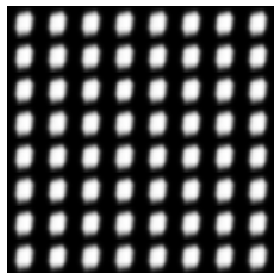

 21%|██        | 106/500 [40:11<2:29:26, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 107 	 Current ELBO: -302.59991455078125
Saved samples to ./pics/mnist_epoch_106_K_2_N_2_amortize_True.png


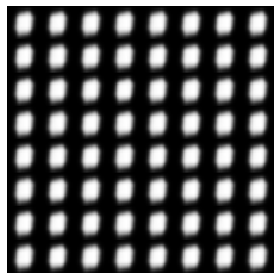

 21%|██▏       | 107/500 [40:34<2:29:02, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 108 	 Current ELBO: -306.880859375
Saved samples to ./pics/mnist_epoch_107_K_2_N_2_amortize_True.png


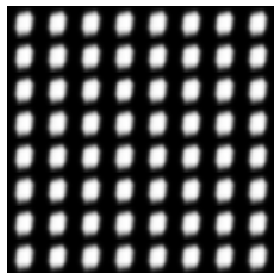

 22%|██▏       | 108/500 [40:56<2:28:39, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4680000222288072 and for +1: 0.5320000252686441
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 109 	 Current ELBO: -294.6367492675781
Saved samples to ./pics/mnist_epoch_108_K_2_N_2_amortize_True.png


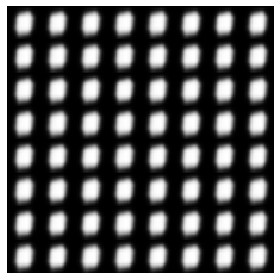

 22%|██▏       | 109/500 [41:19<2:28:20, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 110 	 Current ELBO: -305.9700012207031
Saved samples to ./pics/mnist_epoch_109_K_2_N_2_amortize_True.png


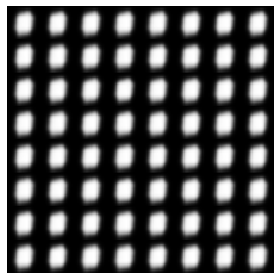

 22%|██▏       | 110/500 [41:42<2:27:56, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 111 	 Current ELBO: -298.0174255371094
Saved samples to ./pics/mnist_epoch_110_K_2_N_2_amortize_True.png


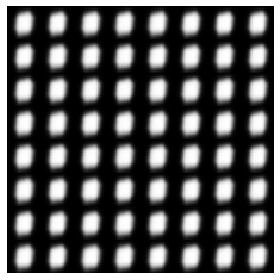

 22%|██▏       | 111/500 [42:05<2:27:33, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4740000225137919 and for +1: 0.5260000249836594
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 112 	 Current ELBO: -307.98907470703125
Saved samples to ./pics/mnist_epoch_111_K_2_N_2_amortize_True.png


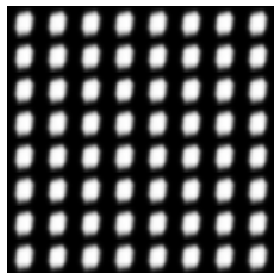

 22%|██▏       | 112/500 [42:27<2:27:10, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 113 	 Current ELBO: -298.5415344238281
Saved samples to ./pics/mnist_epoch_112_K_2_N_2_amortize_True.png


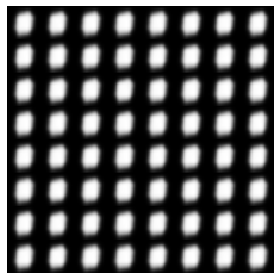

 23%|██▎       | 113/500 [42:50<2:26:46, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 114 	 Current ELBO: -300.23077392578125
Saved samples to ./pics/mnist_epoch_113_K_2_N_2_amortize_True.png


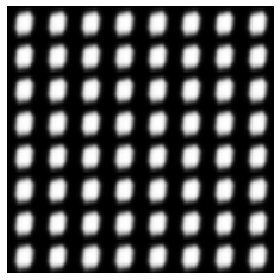

 23%|██▎       | 114/500 [43:13<2:26:23, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4420000209938735 and for +1: 0.5580000265035778
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 115 	 Current ELBO: -301.2440185546875
Saved samples to ./pics/mnist_epoch_114_K_2_N_2_amortize_True.png


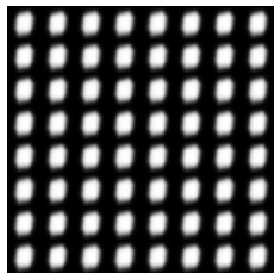

 23%|██▎       | 115/500 [43:36<2:26:00, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 116 	 Current ELBO: -305.21600341796875
Saved samples to ./pics/mnist_epoch_115_K_2_N_2_amortize_True.png


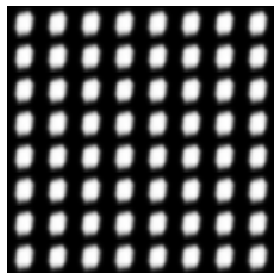

 23%|██▎       | 116/500 [43:58<2:25:36, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4620000219438225 and for +1: 0.5380000255536288
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 117 	 Current ELBO: -299.5685729980469
Saved samples to ./pics/mnist_epoch_116_K_2_N_2_amortize_True.png


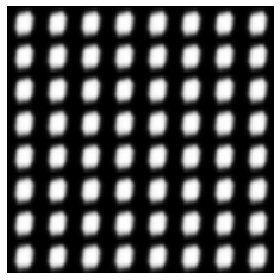

 23%|██▎       | 117/500 [44:21<2:25:16, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5380000255536288 and for +1: 0.4620000219438225
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5320000252686441 and for +1: 0.4680000222288072
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 118 	 Current ELBO: -289.7515869140625
Saved samples to ./pics/mnist_epoch_117_K_2_N_2_amortize_True.png


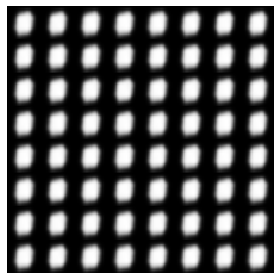

 24%|██▎       | 118/500 [44:44<2:24:52, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4560000216588378 and for +1: 0.5440000258386135
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 119 	 Current ELBO: -309.5191345214844
Saved samples to ./pics/mnist_epoch_118_K_2_N_2_amortize_True.png


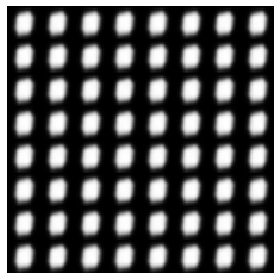

 24%|██▍       | 119/500 [45:07<2:24:32, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.472000022418797 and for +1: 0.5280000250786543
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 120 	 Current ELBO: -294.18060302734375
Saved samples to ./pics/mnist_epoch_119_K_2_N_2_amortize_True.png


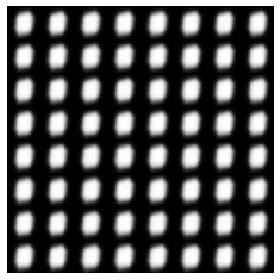

 24%|██▍       | 120/500 [45:30<2:24:11, 22.77s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 121 	 Current ELBO: -295.921142578125
Saved samples to ./pics/mnist_epoch_120_K_2_N_2_amortize_True.png


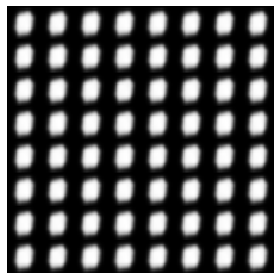

 24%|██▍       | 121/500 [45:52<2:23:46, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.534000025363639 and for +1: 0.4660000221338123
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4640000220388174 and for +1: 0.5360000254586339
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 122 	 Current ELBO: -302.80413818359375
Saved samples to ./pics/mnist_epoch_121_K_2_N_2_amortize_True.png


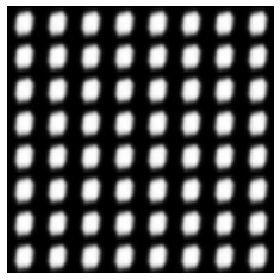

 24%|██▍       | 122/500 [46:15<2:23:22, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 123 	 Current ELBO: -297.1668395996094
Saved samples to ./pics/mnist_epoch_122_K_2_N_2_amortize_True.png


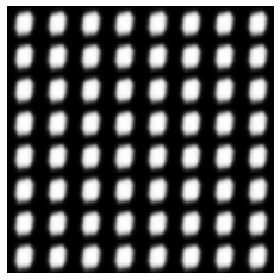

 25%|██▍       | 123/500 [46:38<2:23:05, 22.77s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4760000226087868 and for +1: 0.5240000248886645
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 124 	 Current ELBO: -296.0785827636719
Saved samples to ./pics/mnist_epoch_123_K_2_N_2_amortize_True.png


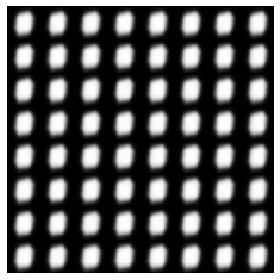

 25%|██▍       | 124/500 [47:01<2:22:40, 22.77s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 125 	 Current ELBO: -308.5556945800781
Saved samples to ./pics/mnist_epoch_124_K_2_N_2_amortize_True.png


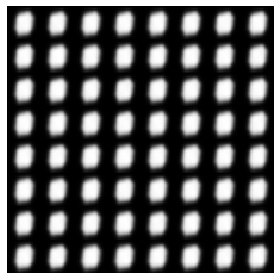

 25%|██▌       | 125/500 [47:23<2:22:15, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 126 	 Current ELBO: -295.5201416015625
Saved samples to ./pics/mnist_epoch_125_K_2_N_2_amortize_True.png


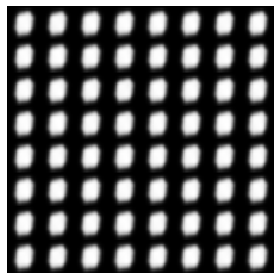

 25%|██▌       | 126/500 [47:46<2:21:50, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4760000226087868 and for +1: 0.5240000248886645
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 127 	 Current ELBO: -296.5169677734375
Saved samples to ./pics/mnist_epoch_126_K_2_N_2_amortize_True.png


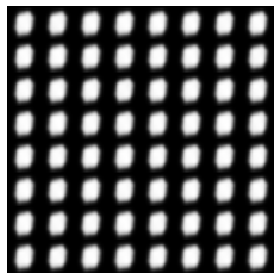

 25%|██▌       | 127/500 [48:09<2:21:27, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5160000245086849 and for +1: 0.48400002298876643
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4780000227037817 and for +1: 0.5220000247936696
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 128 	 Current ELBO: -292.5991516113281
Saved samples to ./pics/mnist_epoch_127_K_2_N_2_amortize_True.png


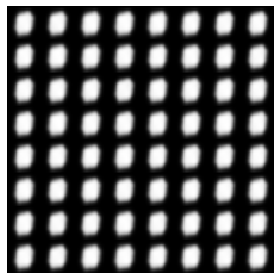

 26%|██▌       | 128/500 [48:32<2:21:03, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5400000256486237 and for +1: 0.4600000218488276
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4400000208988786 and for +1: 0.5600000265985727
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 129 	 Current ELBO: -301.46868896484375
Saved samples to ./pics/mnist_epoch_128_K_2_N_2_amortize_True.png


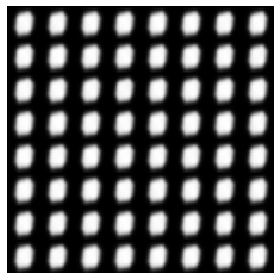

 26%|██▌       | 129/500 [48:54<2:20:40, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4680000222288072 and for +1: 0.5320000252686441
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5240000248886645 and for +1: 0.4760000226087868
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 130 	 Current ELBO: -299.2693176269531
Saved samples to ./pics/mnist_epoch_129_K_2_N_2_amortize_True.png


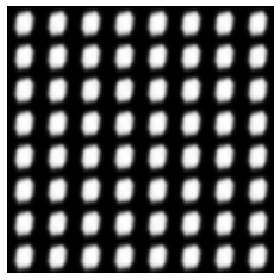

 26%|██▌       | 130/500 [49:17<2:20:17, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5320000252686441 and for +1: 0.4680000222288072
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4780000227037817 and for +1: 0.5220000247936696
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 131 	 Current ELBO: -299.61376953125
Saved samples to ./pics/mnist_epoch_130_K_2_N_2_amortize_True.png


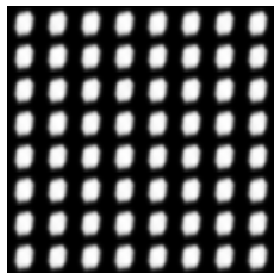

 26%|██▌       | 131/500 [49:40<2:19:55, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4780000227037817 and for +1: 0.5220000247936696
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 132 	 Current ELBO: -291.59881591796875
Saved samples to ./pics/mnist_epoch_131_K_2_N_2_amortize_True.png


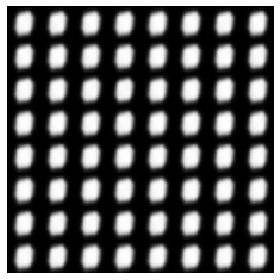

 26%|██▋       | 132/500 [50:03<2:19:31, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5300000251736492 and for +1: 0.4700000223238021
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 133 	 Current ELBO: -290.77496337890625
Saved samples to ./pics/mnist_epoch_132_K_2_N_2_amortize_True.png


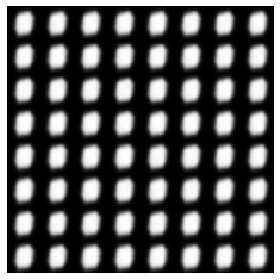

 27%|██▋       | 133/500 [50:25<2:19:08, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.472000022418797 and for +1: 0.5280000250786543
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 134 	 Current ELBO: -287.9842834472656
Saved samples to ./pics/mnist_epoch_133_K_2_N_2_amortize_True.png


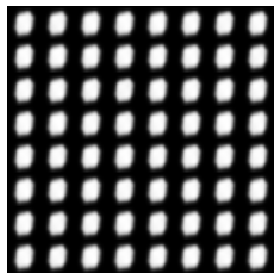

 27%|██▋       | 134/500 [50:48<2:18:46, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.472000022418797 and for +1: 0.5280000250786543
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.534000025363639 and for +1: 0.4660000221338123
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 135 	 Current ELBO: -300.2189025878906
Saved samples to ./pics/mnist_epoch_134_K_2_N_2_amortize_True.png


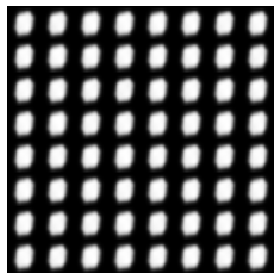

 27%|██▋       | 135/500 [51:11<2:18:23, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5220000247936696 and for +1: 0.4780000227037817
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 136 	 Current ELBO: -302.3031921386719
Saved samples to ./pics/mnist_epoch_135_K_2_N_2_amortize_True.png


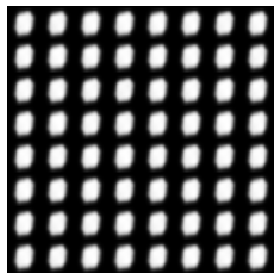

 27%|██▋       | 136/500 [51:34<2:18:01, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 137 	 Current ELBO: -297.4413757324219
Saved samples to ./pics/mnist_epoch_136_K_2_N_2_amortize_True.png


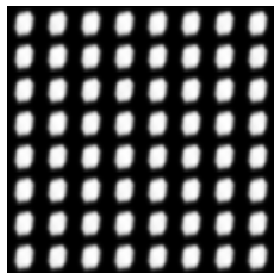

 27%|██▋       | 137/500 [51:56<2:17:41, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 138 	 Current ELBO: -297.08587646484375
Saved samples to ./pics/mnist_epoch_137_K_2_N_2_amortize_True.png


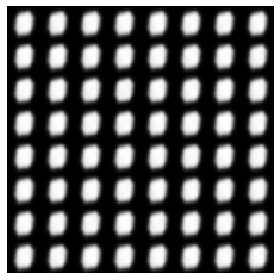

 28%|██▊       | 138/500 [52:19<2:17:17, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5220000247936696 and for +1: 0.4780000227037817
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.534000025363639 and for +1: 0.4660000221338123
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 139 	 Current ELBO: -302.56341552734375
Saved samples to ./pics/mnist_epoch_138_K_2_N_2_amortize_True.png


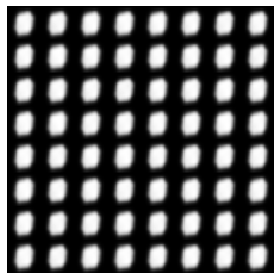

 28%|██▊       | 139/500 [52:42<2:16:54, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5460000259336084 and for +1: 0.4540000215638429
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 140 	 Current ELBO: -311.5834655761719
Saved samples to ./pics/mnist_epoch_139_K_2_N_2_amortize_True.png


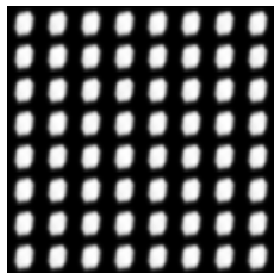

 28%|██▊       | 140/500 [53:05<2:16:31, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4740000225137919 and for +1: 0.5260000249836594
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 141 	 Current ELBO: -302.66448974609375
Saved samples to ./pics/mnist_epoch_140_K_2_N_2_amortize_True.png


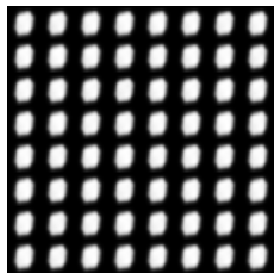

 28%|██▊       | 141/500 [53:27<2:16:07, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5020000238437206 and for +1: 0.49800002365373075
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 142 	 Current ELBO: -300.0427551269531
Saved samples to ./pics/mnist_epoch_141_K_2_N_2_amortize_True.png


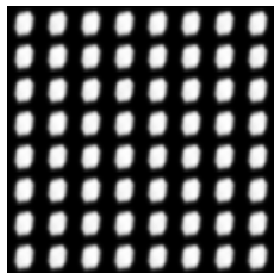

 28%|██▊       | 142/500 [53:50<2:15:44, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49400002346374094 and for +1: 0.5060000240337104
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 143 	 Current ELBO: -297.2550964355469
Saved samples to ./pics/mnist_epoch_142_K_2_N_2_amortize_True.png


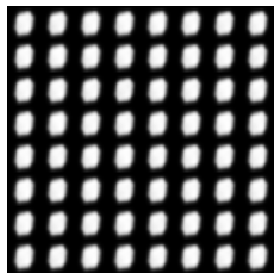

 29%|██▊       | 143/500 [54:13<2:15:20, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5260000249836594 and for +1: 0.4740000225137919
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49000002327375114 and for +1: 0.5100000242237002
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 144 	 Current ELBO: -305.2908935546875
Saved samples to ./pics/mnist_epoch_143_K_2_N_2_amortize_True.png


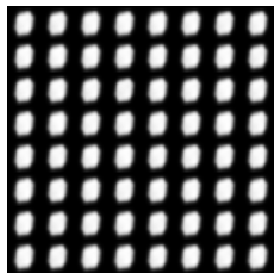

 29%|██▉       | 144/500 [54:36<2:14:58, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5260000249836594 and for +1: 0.4740000225137919
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.534000025363639 and for +1: 0.4660000221338123
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 145 	 Current ELBO: -289.94122314453125
Saved samples to ./pics/mnist_epoch_144_K_2_N_2_amortize_True.png


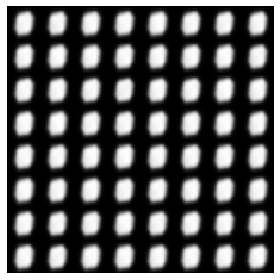

 29%|██▉       | 145/500 [54:58<2:14:35, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5240000248886645 and for +1: 0.4760000226087868
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5300000251736492 and for +1: 0.4700000223238021
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 146 	 Current ELBO: -291.0566711425781
Saved samples to ./pics/mnist_epoch_145_K_2_N_2_amortize_True.png


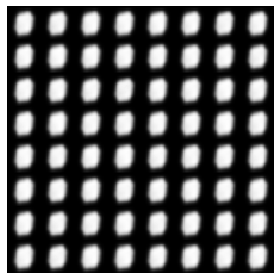

 29%|██▉       | 146/500 [55:21<2:14:12, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 147 	 Current ELBO: -297.07965087890625
Saved samples to ./pics/mnist_epoch_146_K_2_N_2_amortize_True.png


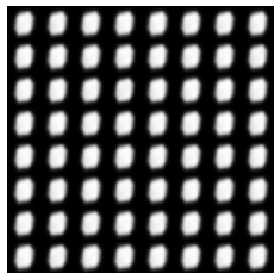

 29%|██▉       | 147/500 [55:44<2:13:49, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 148 	 Current ELBO: -299.0289611816406
Saved samples to ./pics/mnist_epoch_147_K_2_N_2_amortize_True.png


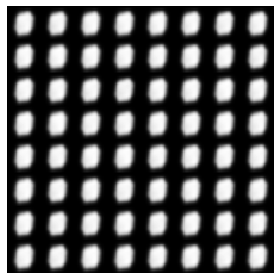

 30%|██▉       | 148/500 [56:07<2:13:27, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5120000243186951 and for +1: 0.48800002317875624
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 149 	 Current ELBO: -294.99188232421875
Saved samples to ./pics/mnist_epoch_148_K_2_N_2_amortize_True.png


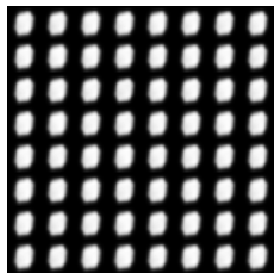

 30%|██▉       | 149/500 [56:29<2:13:04, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5040000239387155 and for +1: 0.49600002355873585
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5420000257436186 and for +1: 0.4580000217538327
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 150 	 Current ELBO: -295.4670715332031
Saved samples to ./pics/mnist_epoch_149_K_2_N_2_amortize_True.png


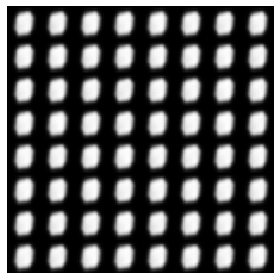

 30%|███       | 150/500 [56:52<2:12:43, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4700000223238021 and for +1: 0.5300000251736492
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 151 	 Current ELBO: -291.2998352050781
Saved samples to ./pics/mnist_epoch_150_K_2_N_2_amortize_True.png


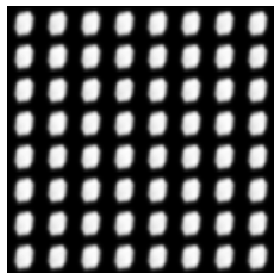

 30%|███       | 151/500 [57:15<2:12:23, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 152 	 Current ELBO: -301.6766357421875
Saved samples to ./pics/mnist_epoch_151_K_2_N_2_amortize_True.png


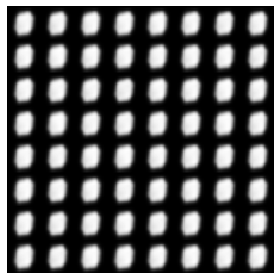

 30%|███       | 152/500 [57:38<2:11:59, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4640000220388174 and for +1: 0.5360000254586339
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 153 	 Current ELBO: -306.5016174316406
Saved samples to ./pics/mnist_epoch_152_K_2_N_2_amortize_True.png


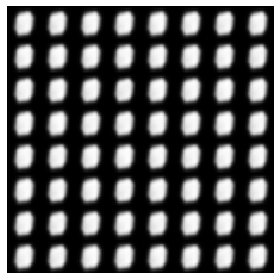

 31%|███       | 153/500 [58:00<2:11:35, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5360000254586339 and for +1: 0.4640000220388174
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 154 	 Current ELBO: -302.4884033203125
Saved samples to ./pics/mnist_epoch_153_K_2_N_2_amortize_True.png


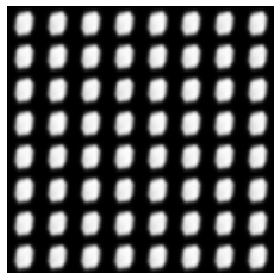

 31%|███       | 154/500 [58:23<2:11:11, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5300000251736492 and for +1: 0.4700000223238021
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5380000255536288 and for +1: 0.4620000219438225
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 155 	 Current ELBO: -297.62158203125
Saved samples to ./pics/mnist_epoch_154_K_2_N_2_amortize_True.png


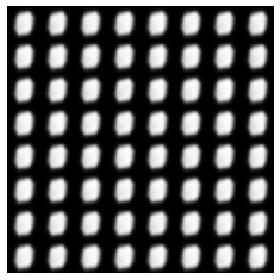

 31%|███       | 155/500 [58:46<2:10:48, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5220000247936696 and for +1: 0.4780000227037817
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 156 	 Current ELBO: -299.7537841796875
Saved samples to ./pics/mnist_epoch_155_K_2_N_2_amortize_True.png


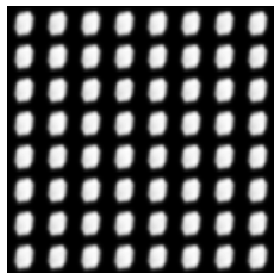

 31%|███       | 156/500 [59:09<2:10:24, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5480000260286033 and for +1: 0.452000021468848
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4740000225137919 and for +1: 0.5260000249836594
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 157 	 Current ELBO: -298.8351745605469
Saved samples to ./pics/mnist_epoch_156_K_2_N_2_amortize_True.png


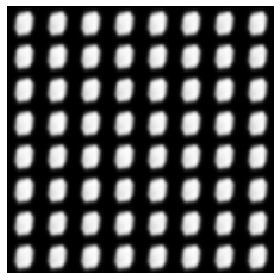

 31%|███▏      | 157/500 [59:31<2:10:01, 22.74s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5400000256486237 and for +1: 0.4600000218488276
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5380000255536288 and for +1: 0.4620000219438225
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 158 	 Current ELBO: -307.7729187011719
Saved samples to ./pics/mnist_epoch_157_K_2_N_2_amortize_True.png


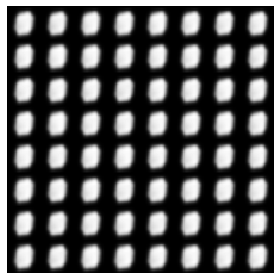

 32%|███▏      | 158/500 [59:54<2:09:38, 22.74s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 159 	 Current ELBO: -291.4573059082031
Saved samples to ./pics/mnist_epoch_158_K_2_N_2_amortize_True.png


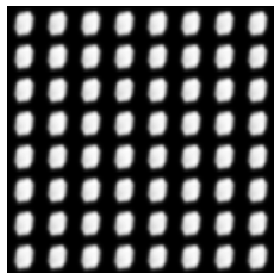

 32%|███▏      | 159/500 [1:00:17<2:09:15, 22.74s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4760000226087868 and for +1: 0.5240000248886645
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4560000216588378 and for +1: 0.5440000258386135
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 160 	 Current ELBO: -295.9568786621094
Saved samples to ./pics/mnist_epoch_159_K_2_N_2_amortize_True.png


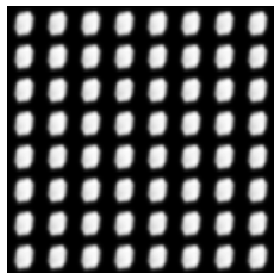

 32%|███▏      | 160/500 [1:00:40<2:08:52, 22.74s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5380000255536288 and for +1: 0.4620000219438225
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48400002298876643 and for +1: 0.5160000245086849
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 161 	 Current ELBO: -299.5459899902344
Saved samples to ./pics/mnist_epoch_160_K_2_N_2_amortize_True.png


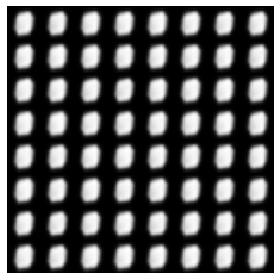

 32%|███▏      | 161/500 [1:01:02<2:08:30, 22.74s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5360000254586339 and for +1: 0.4640000220388174
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5220000247936696 and for +1: 0.4780000227037817
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 162 	 Current ELBO: -299.6632385253906
Saved samples to ./pics/mnist_epoch_161_K_2_N_2_amortize_True.png


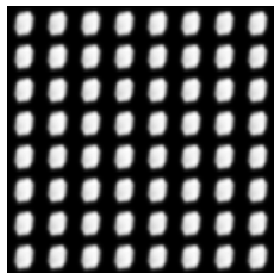

 32%|███▏      | 162/500 [1:01:25<2:08:07, 22.74s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.09999999680245637
Autoregression coeff 0.5
Current epoch: 163 	 Current ELBO: -303.7583312988281
Saved samples to ./pics/mnist_epoch_162_K_2_N_2_amortize_True.png


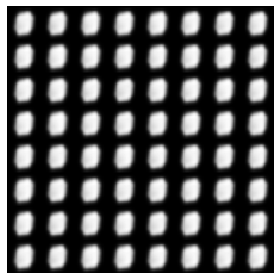

 33%|███▎      | 163/500 [1:01:48<2:07:45, 22.74s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4600000218488276 and for +1: 0.5400000256486237
Stepsize 0.09999999680245637
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.09999999680245637
Autoregression coeff 0.5


In [ ]:
print_info_ = 1

torch_log_2 = torch.tensor(np.log(2.), device=args.device, dtype=args.torchType)


def compute_loss(z_new, p_new, u, p_old, x, sum_log_alpha, sum_log_jac, sum_log_sigma, mu=None, all_directions=None):
    log_p = target.get_logdensity(z=z_new, x=x) + args.std_normal.log_prob(p_new).sum(1)
    if args.learnable_reverse:
        log_r = reverse_kernel(z_fin=z_new, mu=mu.detach(), a=all_directions)
        log_m = args.std_normal.log_prob(u).sum(1) + args.std_normal.log_prob(p_old).sum(1) - sum_log_jac - sum_log_sigma + sum_log_alpha
    else:
        log_r = 0 #-args.K * torch_log_2
        log_m = args.std_normal.log_prob(u).sum(1) + args.std_normal.log_prob(p_old).sum(1) - sum_log_jac - sum_log_sigma # + sum_log_alpha
    
    elbo_full = log_p + log_r - log_m
    grad_elbo = torch.mean(elbo_full + elbo_full.detach() * sum_log_alpha)
    return elbo_full, grad_elbo
  
# with torch.autograd.detect_anomaly():
for ep in tqdm(range(args.num_epoches)): # cycle over epoches
    for b_num, batch_train in enumerate(dataset.next_train_batch()): # cycle over batches

        cond_vectors = [args.std_normal.sample((args.z_dim, )) for _ in range(args.K)]
        optimizer.zero_grad()

        mu, sigma = encoder(batch_train) # sample mu and sigma from encoder
        u = args.std_normal.sample(mu.shape) # sample random tensor for reparametrization trick
        z = mu + sigma * u # reperametrization trick
        p_old = args.std_normal.sample(mu.shape)

        sum_log_alpha = torch.zeros(mu.shape[0], dtype=args.torchType, device=args.device) # for grad log alpha accumulation
        sum_log_jacobian = torch.zeros(mu.shape[0], dtype=args.torchType, device=args.device) # for log_jacobian accumulation
        sum_log_sigma = torch.sum(torch.log(sigma), 1)
        p = p_old
        if args.learnable_reverse:
            all_directions = torch.tensor([], device=args.device)
        else:
            all_directions = None
        for k in range(args.K):
            # sample alpha - transition probabilities 
            if args.amortize:
                z, p, log_jac, current_log_alphas, directions, _ = transitions.make_transition(q_old=z, x=batch_train,
                                                    p_old=p, k=cond_vectors[k], target_distr=target)
            else:
                z, p, log_jac, current_log_alphas, directions, _ = transitions[k].make_transition(q_old=z, x=batch_train,
                                                                    p_old=p, k=cond_vectors[k], target_distr=target) # sample a_i -- directions
            if ep  % print_info_ == 0 and b_num % (100 * print_info_) == 0:
                print('On batch number {}/{} and on k = {} we have for  0: {} and for +1: {}'.format(b_num + 1,
                                                                        dataset.train.shape[0] // args['train_batch_size'],
                                                                           k + 1,
                                                    (directions==0.).to(float).mean(),
                                                                    (directions==1.).to(float).mean()))
                if args.amortize:
                    print('Stepsize {}'.format(np.exp(transitions.gamma.cpu().detach().item())))
                    print('Autoregression coeff {}'.format(torch.sigmoid(transitions.alpha_logit).cpu().detach().item()))
            if args.learnable_reverse:
                all_directions = torch.cat([all_directions, directions.view(-1, 1)], dim=1)
            # Accumulate alphas
            sum_log_alpha = sum_log_alpha + current_log_alphas
            sum_log_jacobian = sum_log_jacobian + log_jac  # refresh log jacobian

        elbo_full, grad_elbo = compute_loss(z_new=z, p_new=p, u=u, p_old=p_old, x=batch_train, sum_log_alpha=sum_log_alpha,
                                            sum_log_jac=sum_log_jacobian, sum_log_sigma=sum_log_sigma, mu=mu, all_directions=all_directions)
    #     pdb.set_trace()
        (-grad_elbo).backward()
        if args.clip_norm:
            torch.nn.utils.clip_grad_norm_(itertools.chain(*params), args.clip_value)
        optimizer.step()
        optimizer.zero_grad()
        # Bias squared
    if ep % print_info_ == 0:
        print('Current epoch:', (ep + 1), '\t', 'Current ELBO:', elbo_full.detach().mean().item())
        plot_digit_samples(samples=get_samples(target.decoder, random_code), args=args, epoch=ep)

In [ ]:
print('a')

In [ ]:
elbo_full.mean()

In [ ]:
print(args.learnable_reverse)